<h3 style="color:darkblue">Missing Data, Time Series, and Plotting Using Matplotlib</h3>
<p>
<li> Handling missing data
<li> Handling time series and dates
<li> Plotting using matplotlib
    </li> 

<table style="width:80%">
  <tr>
    <th style="text-align:center">Short Name</th>
    <th style="text-align:center">Definitions</th> 
  </tr>
  <tr>
    <td style="text-align:center">B, BM</td>
    <td style="text-align:left">This stands for business day, business month. These are the working days of the month, that is, any day that is not a holiday or a weekend.</td> 
  </tr>
  <tr>
    <td style="text-align:center">D, W, M, Q, A</td>
    <td style="text-align:left">It stands for calendar day, week, month, quarter, year-end.</td> 
  </tr>
  <tr>
    <td style="text-align:center">H, T, S, L, U</td>
    <td style="text-align:left">It stands for hour, minute, second, millisecond, and microsecond.</td> 
  </tr>
  <tr>
    <td style="text-align:center">W - SUN, MON, ... </td>
    <td style="text-align:left">for example, W-TUE indicates a weekly frequency starting on a Tuesday.</td> 
  </tr>
  <tr>
    <td style="text-align:center">Q - JAN, FEB, ... DEC</td>
    <td style="text-align:left">for example, Q-MAY indicates a quarterly frequency with the year-end in May.</td> 
  </tr>
  <tr>
    <td style="text-align:center">A - JAN, FEB, ... DEC</td>
    <td style="text-align:left">for example, A-MAY indicates an annual frequency with the year-end in May.</td> 
  </tr>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<b style="color:LightSteelBlue;font-size:130%">Handling </b><b style="color:DarkSlateBlue;font-size:130%">missing data</b>

EX1: Set timestamps to datetime 

In [2]:
date_stngs = ['2014-05-01','2014-05-02','2014-05-05','2014-05-06','2014-05-07']
tradeDates = pd.to_datetime(pd.Series(date_stngs))
closingPrices = [531.35,527.93,527.81,515.14,509.96]
googClosingPrices = pd.DataFrame(data=closingPrices,
                                 columns=['closingPrice'],
                                 index=tradeDates)
googClosingPrices

,closingPrice
2014-05-01,531.35
2014-05-02,527.93
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.96


EX2: Cahnge frequency

Use API data

In [4]:
!pip install pandas-datareader

     |████████████████████████████████| 107 kB 1.8 MB/s eta 0:00:01


In [9]:
import pandas_datareader.data as web
import datetime

In [10]:
googPrices = web.get_data_yahoo("GOOG",
                                start = datetime.datetime(2014, 5, 1),
                                end = datetime.datetime(2014, 5, 7))
googFinalPrices = pd.DataFrame(googPrices['Close'], index=tradeDates)
googFinalPrices

,Close
2014-05-01,529.895203
2014-05-02,526.484558
2014-05-05,526.364868
2014-05-06,513.729553
2014-05-07,508.563751


Reset frequency

In [11]:
googClosingPricesCDays = googClosingPrices.asfreq('D'); googClosingPricesCDays

,closingPrice
2014-05-01,531.35
2014-05-02,527.93
2014-05-03,NaN
2014-05-04,NaN
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.96


EX3: Timestamps missing values 

Weekend and workday data

In [12]:
googClosingPricesCDays.isnull()

,closingPrice
2014-05-01,False
2014-05-02,False
2014-05-03,True
2014-05-04,True
2014-05-05,False
2014-05-06,False
2014-05-07,False


In [13]:
googClosingPricesCDays.notnull()

,closingPrice
2014-05-01,True
2014-05-02,True
2014-05-03,False
2014-05-04,False
2014-05-05,True
2014-05-06,True
2014-05-07,True


In [15]:
tDates = tradeDates.copy()
tDates[1] = np.NaN
tDates[4] = np.NaN
tDates

0   2014-05-01
1          NaT
2   2014-05-05
3   2014-05-06
4          NaT
dtype: datetime64[ns]

EX4: Datetime

In [56]:
FBVolume = [82.34,54.11,45.99,55.86,78.5]
TWTRVolume = [15.74,12.71,10.39,134.62,68.84]
socialTradingVolume = pd.concat([pd.Series(FBVolume),
                                 pd.Series(TWTRVolume),
                                 tradeDates], 
                                axis=1,
                                keys=['FB','TWTR','TradeDate'])
socialTradingVolume

,FB,TWTR,TradeDate
0,82.34,15.74,2014-05-01
1,54.11,12.71,2014-05-02
2,45.99,10.39,2014-05-05
3,55.86,134.62,2014-05-06
4,78.50,68.84,2014-05-07


In [60]:
socialTradingVolTS = socialTradingVolume.set_index('TradeDate')
socialTradingVolTSCal = socialTradingVolTS.asfreq('D'); socialTradingVolTSCal

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,NaN,NaN
2014-05-04,NaN,NaN
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [19]:
socialTradingVolTSCal['FB'] + socialTradingVolTSCal['TWTR']

TradeDate
2014-05-01     98.08
2014-05-02     66.82
2014-05-03       NaN
2014-05-04       NaN
2014-05-05     56.38
2014-05-06    190.48
2014-05-07    147.34
Freq: D, dtype: float64

EX5: Treating the missing value
<p>In pandas, the default is to treat the missing value as 0 and do the aggregate calculation, whereas for NumPy, NaN is returned if any of the values are missing. Here is an illustration:

In [20]:
pd.Series([1.0,np.NaN,5.9,6])+pd.Series([3,5,2,5.6])

0     4.0
1     NaN
2     7.9
3    11.6
dtype: float64

In [21]:
pd.Series([1.0,25.0,5.5,6])/pd.Series([3,np.NaN,2,5.6])

0    0.333333
1         NaN
2    2.750000
3    1.071429
dtype: float64

In [62]:
print(np.mean([1.0,np.NaN,5.9,6]))
print(np.sum([1.0,np.NaN,5.9,6]))

nan
nan


It is important to be aware of this difference in behavior between pandas and NumPy. However, if we wish to get NumPy to behave the same way as pandas, we can use the np.nanmean and np.nansum functions, 

In [63]:
print(pd.Series([1.0,np.NaN,5.9,6]).sum())
print(pd.Series([1.0,np.NaN,5.9,6]).mean())

12.9
4.3


In [64]:
print(np.nanmean([1.0,np.NaN,5.9,6]))
print(np.nansum([1.0,np.NaN,5.9,6]))

4.3
12.9


EX6: Handling missing values

In [28]:
socialTradingVolTSCal

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,NaN,NaN
2014-05-04,NaN,NaN
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


A) Fill with specific value 

In [29]:
socialTradingVolTSCal.fillna(100)

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,100.00,100.00
2014-05-04,100.00,100.00
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


B) Forward fill

In [30]:
socialTradingVolTSCal.fillna(method='ffill')

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,54.11,12.71
2014-05-04,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


C) Backward fill

In [31]:
socialTradingVolTSCal.fillna(method='bfill')

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,45.99,10.39
2014-05-04,45.99,10.39
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


D) Drop or delete missing value row

In [32]:
socialTradingVolTSCal.dropna()

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


E) Interpolation

In [33]:
pd.set_option('display.precision',4)
socialTradingVolTSCal.interpolate()

,FB,TWTR
TradeDate,,
2014-05-01,82.3400,15.7400
2014-05-02,54.1100,12.7100
2014-05-03,51.4033,11.9367
2014-05-04,48.6967,11.1633
2014-05-05,45.9900,10.3900
2014-05-06,55.8600,134.6200
2014-05-07,78.5000,68.8400


<b style="color:LightSteelBlue;font-size:130%">Handling </b><b style="color:DarkSlateBlue;font-size:130%">time series</b>

EX7: Reading in time series data

A) Cleaning data

In [73]:
ibmData = pd.read_csv('ibm-common-stock-closing-prices-1959_1960.csv'); ibmData.head()

,TradeDate,closingPrice
0,1959-06-29,445
1,1959-06-30,448
2,1959-07-01,450
3,1959-07-02,447e
4,1959-07-06,451


In [81]:
ibmData.loc[3,'closingPrice'] = 447
ibmData['closingPrice'] = ibmData['closingPrice'].astype('int')

B) String to timestamps

In [82]:
type(ibmData['TradeDate']), type(ibmData['TradeDate'][0])

(pandas.core.series.Series, str)

In [83]:
ibmData['TradeDate'] = pd.to_datetime(ibmData['TradeDate'])
type(ibmData['TradeDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

C) Resample 

In [54]:
ibmTS = ibmData.set_index('TradeDate').resample('D').sum()['closingPrice'].dropna()
ibmTS

TradeDate
1959-06-29     445
1959-06-30     448
1959-07-01     450
1959-07-02    447e
1959-07-03       0
              ... 
1960-06-26       0
1960-06-27     519
1960-06-28     519
1960-06-29     522
1960-06-30     522
Freq: D, Name: closingPrice, Length: 368, dtype: object

In [46]:
ibmData['TradeDate'] = pd.to_datetime(ibmData['TradeDate'])
ibmData.set_index('TradeDate')

,closingPrice
TradeDate,
1959-06-29,445
1959-06-30,448
1959-07-01,450
1959-07-02,447e
1959-07-06,451
...,...
1960-06-24,525
1960-06-27,519
1960-06-28,519


EX8: DateOffset and TimeDelta objects
<p>A DateOffset object represents a change or offset in time. The key features of a DateOffset object are as follows:
<li>This can be added/subtracted to/from a datetime object to obtain a shifted date
<li>This can be multiplied by an integer (positive or negative) so that the increment can be applied multiple times
<li>This has the rollforward and rollback methods to move a date forward to the next offset date or backward to the previous offset date
    </li>
    </p>

In [84]:
from datetime import datetime

A) One day from Xmas 

In [88]:
xmasDay = datetime(2014,12,25)
boxingDay = xmasDay + pd.DateOffset(days=1); boxingDay

Timestamp('2014-12-26 00:00:00')

B) One week from today

In [89]:
today = datetime.now()
today + pd.DateOffset(weeks=1)

Timestamp('2021-01-20 01:29:13.553811')

C) Five years from now

In [90]:
today + 2*pd.DateOffset(years=2, months=6)

Timestamp('2026-01-13 01:29:13.553811')

D) QuarterBegin 
<p>DateOffset object that is used to increment a given datetime object to the start of the next calendar quarter:

In [91]:
from pandas.tseries.offsets import QuarterBegin

In [93]:
lastDay = datetime(2013,12,31)
dtoffset = QuarterBegin()
lastDay + dtoffset

Timestamp('2014-03-01 00:00:00')

In [95]:
dtoffset.rollforward(lastDay)

Timestamp('2014-03-01 00:00:00')

E) timedelta 

In [100]:
from datetime import timedelta
weekDelta = timedelta(weeks=1); weekDelta

datetime.timedelta(days=7)

In [101]:
today + weekDelta

datetime.datetime(2021, 1, 20, 1, 29, 13, 553811)

EX9: Time series-related instance methods

A) Shifting/lagging

In [119]:
ibmTS

TradeDate
1959-06-29     445
1959-06-30     448
1959-07-01     450
1959-07-02    447e
1959-07-03       0
              ... 
1960-06-26       0
1960-06-27     519
1960-06-28     519
1960-06-29     522
1960-06-30     522
Freq: D, Name: closingPrice, Length: 368, dtype: object

In [102]:
ibmTS.shift(3)

TradeDate
1959-06-29    NaN
1959-06-30    NaN
1959-07-01    NaN
1959-07-02    445
1959-07-03    448
             ... 
1960-06-26    513
1960-06-27    525
1960-06-28      0
1960-06-29      0
1960-06-30    519
Freq: D, Name: closingPrice, Length: 368, dtype: object

In [121]:
ibmTS.shift(3, freq='B')

TradeDate
1959-07-02     445
1959-07-03     448
1959-07-06     450
1959-07-07    447e
1959-07-08       0
              ... 
1960-06-29       0
1960-06-30     519
1960-07-01     519
1960-07-04     522
1960-07-05     522
Name: closingPrice, Length: 368, dtype: object

B) Frequency conversion
<p> note: Here, bm stands for business month end frequency.

In [122]:
ibmTS.asfreq('BM')

TradeDate
1959-06-30    448
1959-07-31    428
1959-08-31    425
1959-09-30    411
1959-10-30    411
1959-11-30    428
1959-12-31    439
1960-01-29    418
1960-02-29    419
1960-03-31    445
1960-04-29    453
1960-05-31    504
1960-06-30    522
Freq: BM, Name: closingPrice, dtype: object

In [123]:
ibmTS.asfreq('H')

TradeDate
1959-06-29 00:00:00    445
1959-06-29 01:00:00    NaN
1959-06-29 02:00:00    NaN
1959-06-29 03:00:00    NaN
1959-06-29 04:00:00    NaN
                      ... 
1960-06-29 20:00:00    NaN
1960-06-29 21:00:00    NaN
1960-06-29 22:00:00    NaN
1960-06-29 23:00:00    NaN
1960-06-30 00:00:00    522
Freq: H, Name: closingPrice, Length: 8809, dtype: object

In [124]:
ibmTS.asfreq('H', method='ffill')

TradeDate
1959-06-29 00:00:00    445
1959-06-29 01:00:00    445
1959-06-29 02:00:00    445
1959-06-29 03:00:00    445
1959-06-29 04:00:00    445
                      ... 
1960-06-29 20:00:00    522
1960-06-29 21:00:00    522
1960-06-29 22:00:00    522
1960-06-29 23:00:00    522
1960-06-30 00:00:00    522
Freq: H, Name: closingPrice, Length: 8809, dtype: object

EX10: Resampling of data

In [125]:
googTickData = pd.read_csv('./GOOG_tickdata_20140527.csv'); googTickData.head()

,Timestamp,close,high,low,open,volume
0,1401197402,555.008,556.41,554.35,556.38,81100
1,1401197460,556.250,556.30,555.25,555.25,18500
2,1401197526,556.730,556.75,556.05,556.39,9900
3,1401197582,557.480,557.67,556.73,556.73,14700
4,1401197642,558.155,558.66,557.48,557.59,15700


In [112]:
googTickData['tstamp'] = pd.to_datetime(googTickData['Timestamp'],unit='s',utc=True)
googTickData.head()

,Timestamp,close,high,low,open,volume,tstamp
0,1401197402,555.008,556.41,554.35,556.38,81100,2014-05-27 13:30:02+00:00
1,1401197460,556.250,556.30,555.25,555.25,18500,2014-05-27 13:31:00+00:00
2,1401197526,556.730,556.75,556.05,556.39,9900,2014-05-27 13:32:06+00:00
3,1401197582,557.480,557.67,556.73,556.73,14700,2014-05-27 13:33:02+00:00
4,1401197642,558.155,558.66,557.48,557.59,15700,2014-05-27 13:34:02+00:00


EX11: Timezone

In [113]:
googTickTS = googTickData.set_index('tstamp')
googTickTS = googTickTS.drop('Timestamp',axis=1)
googTickTS.head()

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 13:30:02+00:00,555.008,556.41,554.35,556.38,81100
2014-05-27 13:31:00+00:00,556.250,556.30,555.25,555.25,18500
2014-05-27 13:32:06+00:00,556.730,556.75,556.05,556.39,9900
2014-05-27 13:33:02+00:00,557.480,557.67,556.73,556.73,14700
2014-05-27 13:34:02+00:00,558.155,558.66,557.48,557.59,15700


trading day—from 9:30 a.m., when the stock market opens, until 4:00 p.m., when it closes.

In [127]:
googTickTS.index = googTickTS.index.tz_convert('US/Eastern')
googTickTS.head()

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:02-04:00,555.008,556.41,554.35,556.38,81100
2014-05-27 09:31:00-04:00,556.250,556.30,555.25,555.25,18500
2014-05-27 09:32:06-04:00,556.730,556.75,556.05,556.39,9900
2014-05-27 09:33:02-04:00,557.480,557.67,556.73,556.73,14700
2014-05-27 09:34:02-04:00,558.155,558.66,557.48,557.59,15700


In [129]:
googTickTS.tail()

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 15:56:00-04:00,565.4300,565.48,565.30,565.385,14300
2014-05-27 15:57:00-04:00,565.3050,565.46,565.20,565.400,14700
2014-05-27 15:58:00-04:00,565.1101,565.31,565.10,565.310,23200
2014-05-27 15:59:00-04:00,565.9400,566.00,565.08,565.230,55600
2014-05-27 16:00:00-04:00,565.9500,565.95,565.95,565.950,126000


In [128]:
len(googTickTS)

390

EX12: Snapshot every time horizon periods

In [159]:
googTickTS5 =  googTickTS.resample('5Min').sum(); googTickTS5.head()

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,2783.6230,2785.7900,2779.860,2782.3400,139900
2014-05-27 09:35:00-04:00,2784.6824,2788.2400,2784.255,2786.7100,123100
2014-05-27 09:40:00-04:00,2782.4300,2783.9997,2781.385,2783.0339,43100
2014-05-27 09:45:00-04:00,2785.2650,2786.3800,2783.690,2784.8300,48600
2014-05-27 09:50:00-04:00,2783.3100,2784.6798,2782.320,2784.0163,72800


In [161]:
googTickTS.resample('10Min').min().head(4)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,555.008,556.3000,554.35,555.25,9900
2014-05-27 09:40:00-04:00,556.190,556.5600,556.13,556.35,3500
2014-05-27 09:50:00-04:00,554.770,555.5500,554.77,555.55,3400
2014-05-27 10:00:00-04:00,554.580,554.9847,554.45,554.58,1800


In [162]:
pd.set_option('display.precision',5)
googTickTS.resample('5Min', closed='right').sum().tail(3)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 15:45:00-04:00,3385.9000,3386.24,3384.645,3385.0199,76900
2014-05-27 15:50:00-04:00,2260.4510,2260.69,2260.036,2260.2600,53300
2014-05-27 15:55:00-04:00,3393.0951,3393.62,3391.850,3392.4950,245600


EX13: Determine how the gaps should be filled

In [166]:
googTickTS[:3].resample('30s').ffill()

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,NaN,NaN,NaN,NaN,NaN
2014-05-27 09:30:30-04:00,555.008,556.41,554.35,556.38,81100.0
2014-05-27 09:31:00-04:00,556.250,556.30,555.25,555.25,18500.0
2014-05-27 09:31:30-04:00,556.250,556.30,555.25,555.25,18500.0
2014-05-27 09:32:00-04:00,556.250,556.30,555.25,555.25,18500.0


In [165]:
googTickTS[:3].resample('30s').bfill()

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,555.008,556.41,554.35,556.38,81100
2014-05-27 09:30:30-04:00,556.250,556.30,555.25,555.25,18500
2014-05-27 09:31:00-04:00,556.250,556.30,555.25,555.25,18500
2014-05-27 09:31:30-04:00,556.730,556.75,556.05,556.39,9900
2014-05-27 09:32:00-04:00,556.730,556.75,556.05,556.39,9900


EX14: Aliases for Time Series frequencies 
<p>we resample every 7 minutes and 30 seconds:

In [167]:
googTickTS.resample('7T30S').sum().head(5)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,4454.6130,4459.4900,4450.5150,4455.0400,224600
2014-05-27 09:37:30-04:00,3896.1224,3898.5397,3894.9850,3897.0439,81500
2014-05-27 09:45:00-04:00,3898.9450,3900.5298,3897.0200,3898.9098,68600
2014-05-27 09:52:30-04:00,4449.4590,4452.3000,4448.2800,4451.1165,114800
2014-05-27 10:00:00-04:00,4441.6892,4443.4947,4438.6301,4439.7400,100100


EX15: Time series concepts and datatypes

In [134]:
pd.Period('2014', freq='A-MAY')

Period('2014', 'A-MAY')

In [135]:
pd.Period('06/11/2014')

Period('2014-06-11', 'D')

In [136]:
pd.Period('11/11/1918 11:00',freq='H')

Period('1918-11-11 11:00', 'H')

In [139]:
pd.Period('06/30/2014') + 4

Period('2014-07-04', 'D')

In [138]:
pd.Period('11/11/1918 11:00',freq='H') - 48

Period('1918-11-09 11:00', 'H')

In [141]:
pd.Period('2014-04', freq='M') - pd.Period('2013-02', freq='M')

<14 * MonthEnds>

EX16: PeriodIndex

In [142]:
perRng = pd.period_range('02/01/2014','02/06/2014',freq='D'); perRng

PeriodIndex(['2014-02-01', '2014-02-02', '2014-02-03', '2014-02-04',
             '2014-02-05', '2014-02-06'],
            dtype='period[D]', freq='D')

In [143]:
type(perRng[:2])

pandas.core.indexes.period.PeriodIndex

In [144]:
perRng[:2]

PeriodIndex(['2014-02-01', '2014-02-02'], dtype='period[D]', freq='D')

In [145]:
JulyPeriod = pd.PeriodIndex(['07/01/2014','07/31/2014'],freq='D'); JulyPeriod 

PeriodIndex(['2014-07-01', '2014-07-31'], dtype='period[D]', freq='D')

EX17: Conversions between Time Series datatypes
<p>errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
<li>If ‘raise’, then invalid parsing will raise an exception.
<li>If ‘coerce’, then invalid parsing will be set as NaT.
<li>If ‘ignore’, then invalid parsing will return the input.

In [146]:
worldCupFinal = pd.to_datetime('07/13/2014',errors='raise'); worldCupFinal

Timestamp('2014-07-13 00:00:00')

In [147]:
worldCupFinal.to_period('D')

Period('2014-07-13', 'D')

In [148]:
worldCupKickoff = pd.Period('06/12/2014','D'); worldCupKickoff

Period('2014-06-12', 'D')

In [149]:
worldCupKickoff.to_timestamp()

Timestamp('2014-06-12 00:00:00')

In [151]:
worldCupDays = pd.date_range('06/12/2014',periods=32, freq='D'); worldCupDays

DatetimeIndex(['2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
               '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
               '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01',
               '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
               '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
               '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13'],
              dtype='datetime64[ns]', freq='D')

In [152]:
worldCupDays.to_period()

PeriodIndex(['2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
             '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
             '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
             '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
             '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01',
             '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
             '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
             '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13'],
            dtype='period[D]', freq='D')

<b style="color:LightSteelBlue;font-size:130%">Plotting using </b><b style="color:DarkSlateBlue;font-size:130%">matplotlib</b>

EX18:

In [155]:
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
f,g = np.cos(X)+np.sin(X), np.sin(X)-np.cos(X)
f_ser = pd.Series(f)
g_ser = pd.Series(g)
plotDF = pd.concat([f_ser,g_ser],axis=1)
plotDF.index = X
plotDF.columns=['sin(x)+cos(x)','sin(x)-cos(x)']
plotDF.head()

,sin(x)+cos(x),sin(x)-cos(x)
-3.1416,-1.0000,1.0000
-3.1170,-1.0243,0.9751
-3.0923,-1.0480,0.9495
-3.0677,-1.0711,0.9234
-3.0430,-1.0935,0.8967


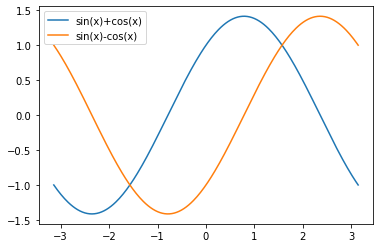

In [156]:
plotDF.plot()
plt.show()

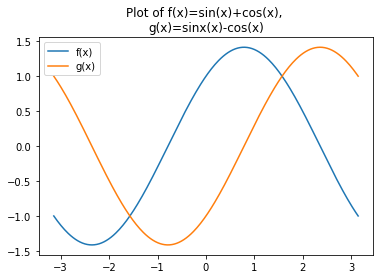

In [157]:
plotDF.columns=['f(x)','g(x)']
plotDF.plot(title='Plot of f(x)=sin(x)+cos(x), \ng(x)=sinx(x)-cos(x)')
plt.show()

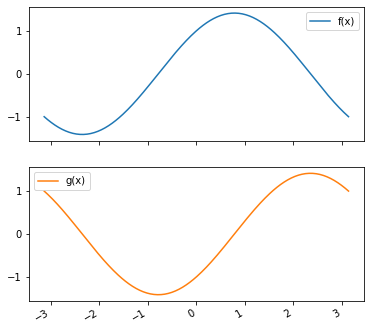

In [158]:
plotDF.plot(subplots=True, figsize=(6,6))
plt.show()